In [89]:
import pickle
import sklearn

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [90]:
data_dict = pickle.load(open("./data.pickle", 'rb'))

In [91]:
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [92]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle = True, stratify=labels, random_state=42)

In [93]:
modelrfc = RandomForestClassifier(n_estimators=100, random_state=42)
modelrfc.fit(x_train, y_train)
y_predict=modelrfc.predict(x_test)

In [94]:
# 将模型保存为 .pkl 文件
import pickle
with open('modelrfc.p', 'wb') as file:
    pickle.dump(modelrfc, file)


In [95]:
score=accuracy_score(y_test, y_predict)
print('Accuracy:', score*100)

Accuracy: 100.0


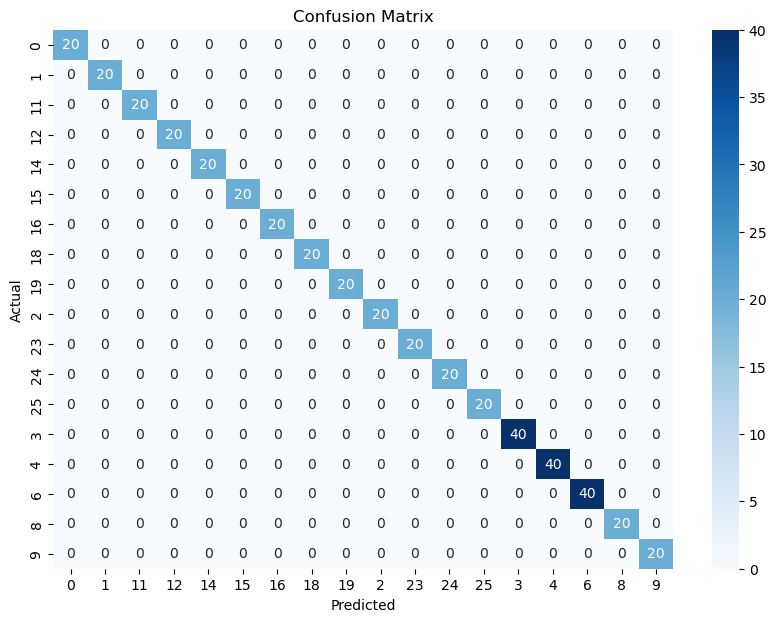

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [97]:
f2 = fbeta_score(y_test, y_predict, beta=2, average='macro')
recall = recall_score(y_test, y_predict, average='macro')
print("F2 Score:", f2*100)
print("Recall:", recall*100)

F2 Score: 100.0
Recall: 100.0


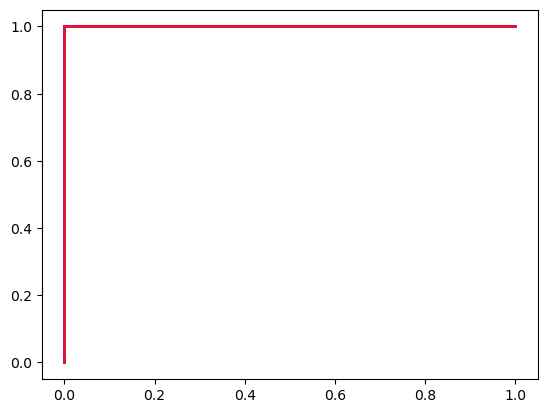

In [98]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# 绘制 ROC 曲线
y_test_binary = label_binarize(y_test, classes=np.unique(labels))
y_score = modelrfc.predict_proba(x_test)

plt.figure()
for i in range(y_test_binary.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color ='crimson', lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc))